## STORE ITEMS DATA

In [15]:
# imports
from acquire import df_combiner
import pandas as pd

In [24]:
# function retrieves sales, stores and items data then combines into single df 
def stores_sales_items_complete():
    """
    No arguments needed. Function retrieves data from 3 csv files then combines into single DF.
    """
    # reading in data from CSVs and storing
    stores = pd.read_csv('stores.csv') 
    items = pd.read_csv('items.csv')
    sales = pd.read_csv('sales.csv')
    
    # using function from acquire to combine DFs into single df
    df = df_combiner(items, stores, sales)
    
    # reading DF
    return df

In [25]:
# testing function
df = stores_sales_items_complete()

# previewing results
df.head(2)

,item,sale_amount,sale_date,sale_id,store,store_address,store_city,store_id,store_state,store_zipcode,item_brand,item_id,item_name,item_price,item_upc12,item_upc14
0,1,13.0,"Tue, 01 Jan 2013 00:00:00 GMT",1,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013
1,1,11.0,"Wed, 02 Jan 2013 00:00:00 GMT",2,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013


### Convert date column to datetime format.

In [26]:
# creating function to convert date values to datetime format
def datetime_formatter(df):
    """
    Accepts DF. Converts sale_date column to datetime format then returns DF.
    """
    # converting date to datetime format
    df.sale_date = pd.to_datetime(df.sale_date)
    # returning df
    return df

In [27]:
# testing function
dftime = datetime_formatter(df)

# previewing data
dftime.head()

,item,sale_amount,sale_date,sale_id,store,store_address,store_city,store_id,store_state,store_zipcode,item_brand,item_id,item_name,item_price,item_upc12,item_upc14
0,1,13.0,2013-01-01 00:00:00+00:00,1,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013
1,1,11.0,2013-01-02 00:00:00+00:00,2,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013
2,1,14.0,2013-01-03 00:00:00+00:00,3,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013
3,1,13.0,2013-01-04 00:00:00+00:00,4,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013
4,1,10.0,2013-01-05 00:00:00+00:00,5,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013


### Plot the distribution of sale_amount and item_price.

In [31]:
# creating function that outputs distribution

def sales_plotter(dftime):
    """
    Accepts DF then creates plot of sale_amount and item_price.
    """
    # grouping by sales date and summing sale_amount from each date
    by_date = df.groupby(['sale_date']).sale_amount.sum().reset_index()
    # returning plot
    return by_date.plot(x='sale_date', y='sale_amount')

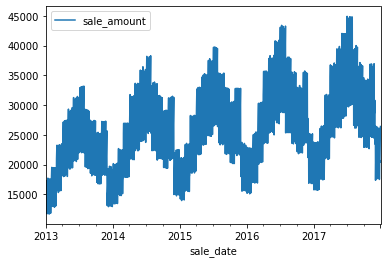

In [32]:
# testing function
sales_plotter(df)

### Set the index to be the datetime variable.

In [33]:
# creating function that sets date column as index
def date_time_indexer(dftime):
    """
    Accepts DF and returns with date column as index, sorted.
    """
    # setting sale_date column as index and sorting
    dftime = dftime.set_index("sale_date").sort_index()
    # returning DF
    return dftime

In [35]:
# testing function
df = date_time_indexer(dftime)

# observing results
df.head()

,item,sale_amount,sale_id,store,store_address,store_city,store_id,store_state,store_zipcode,item_brand,item_id,item_name,item_price,item_upc12,item_upc14
sale_date,,,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,1,13.0,1,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013
2013-01-01 00:00:00+00:00,12,26.0,211817,7,12018 Perrin Beitel Rd,San Antonio,7,TX,78217,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211
2013-01-01 00:00:00+00:00,46,27.0,832657,7,12018 Perrin Beitel Rd,San Antonio,7,TX,78217,Mama Marys,46,Pizza Sauce,4.65,35457770664,35457770664
2013-01-01 00:00:00+00:00,12,54.0,213643,8,15000 San Pedro Ave,San Antonio,8,TX,78232,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211
2013-01-01 00:00:00+00:00,12,35.0,215469,9,735 SW Military Dr,San Antonio,9,TX,78221,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211


### Add a 'month' and 'day of week' column to your dataframe.

In [41]:
# function adds month and day of week column to DF
def month_day_adder(df):
    """
    Accepts DF. Adds column containing month and day of each sales. Returns DF.
    """
    # creating month and day of week columns
    df['month'] = df.index.month
    df['day_of_week'] = df.index.day_name()
    # returning df
    return df

In [42]:
# testing function
df = month_day_adder(df)

# checking results
df.head()

,item,sale_amount,sale_id,store,store_address,store_city,store_id,store_state,store_zipcode,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,month,day_of_week
sale_date,,,,,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,1,13.0,1,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,1,Tuesday
2013-01-01 00:00:00+00:00,12,26.0,211817,7,12018 Perrin Beitel Rd,San Antonio,7,TX,78217,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,1,Tuesday
2013-01-01 00:00:00+00:00,46,27.0,832657,7,12018 Perrin Beitel Rd,San Antonio,7,TX,78217,Mama Marys,46,Pizza Sauce,4.65,35457770664,35457770664,1,Tuesday
2013-01-01 00:00:00+00:00,12,54.0,213643,8,15000 San Pedro Ave,San Antonio,8,TX,78232,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,1,Tuesday
2013-01-01 00:00:00+00:00,12,35.0,215469,9,735 SW Military Dr,San Antonio,9,TX,78221,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,1,Tuesday


### Add a column to your dataframe, sales_total, which is a derived from sale_amount (total items) and item_price.

In [46]:
# function calculates total sale amount
def sales_total_adder(df):
    """
    Accepts DF. Calculates total sale by multiplying sale_amount and item_price and add as new columns. Returns DF.
    """
    # creating new column sales_total and storing product of sale amount and item price
    df['sales_total'] = df.sale_amount * df.item_price
    # returning DF
    return df

In [48]:
# testing function
df = sales_total_adder(df)

# checking results
df.head()

,item,sale_amount,sale_id,store,store_address,store_city,store_id,store_state,store_zipcode,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,month,day_of_week,sales_total
sale_date,,,,,,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,1,13.0,1,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,1,Tuesday,10.92
2013-01-01 00:00:00+00:00,12,26.0,211817,7,12018 Perrin Beitel Rd,San Antonio,7,TX,78217,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,1,Tuesday,218.40
2013-01-01 00:00:00+00:00,46,27.0,832657,7,12018 Perrin Beitel Rd,San Antonio,7,TX,78217,Mama Marys,46,Pizza Sauce,4.65,35457770664,35457770664,1,Tuesday,125.55
2013-01-01 00:00:00+00:00,12,54.0,213643,8,15000 San Pedro Ave,San Antonio,8,TX,78232,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,1,Tuesday,453.60
2013-01-01 00:00:00+00:00,12,35.0,215469,9,735 SW Military Dr,San Antonio,9,TX,78221,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,1,Tuesday,294.00


### Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.

In [50]:
print('All solutions converted into functions.')

All solutions converted into functions.


## GERMANY DATA

### Convert date column to datetime format.

### Plot the distribution of each of your variables.

### Set the index to be the datetime variable.

### Add a month and a year column to your dataframe.

### Fill any missing values.

### Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.